In [91]:
import numpy as np

import ipywidgets as widgets
from ipywidgets import HBox
from IPython.display import display
from ipywidgets import Button, Layout
from ipywidgets import IntSlider
from ipywidgets import HBox, VBox

IntSlider(description='A too long description')



import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

import time

In [92]:
images = np.load('trackImages.npy')
images.shape

(600, 224, 224, 3)

In [93]:
excLst = list(range(250, 300))
images = np.delete(images, excLst, axis=0)
images.shape

(550, 224, 224, 3)

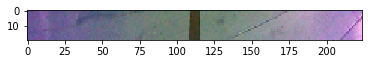

In [94]:
imgplot = plt.imshow(images[1][150:170])

In [95]:
is_success, im_buf_arr = cv2.imencode(".jpg", images[0][150:170])
byte_im = im_buf_arr.tobytes()

In [ ]:
trackPositions = []

In [114]:
nextButton = widgets.Button(
                    description='Next',
                    disabled=False,
                    button_style='', # 'success', 'info', 'warning', 'danger' or ''
                    tooltip='Next',
                    icon='check' # (FontAwesome names without the `fa-` prefix)
                )

# create the image display widget
imgDisp = widgets.Image(
            value=byte_im,
            format='png',
            width=300,
            height=400,
        )

track = widgets.FloatSlider(
    value=7.5,
    min=0,
    max=225,
    step=0.1,
    description='',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=Layout(width='380px')
)

# create the output widget for text message
output = widgets.Output()
output2 = widgets.Output()

d = HBox([imgDisp, output, nextButton])

# display to the screen the widgets
display(d, track, output2)

class CurImage():
    
    def __init__(self):
        
        self.pos = 0
        
    def update(self):
        
        self.pos = self.pos + 1
        
        
curImage = CurImage()


class TrackPos():
    
    def __init__(self):
        
        self.pos = []
        
    def update(self,pos):
        
        self.pos.append(pos)
        
        
trackPositions = TrackPos()


def on_button_clicked(b):
     
    is_success, im_buf_arr = cv2.imencode(".jpg", images[curImage.pos][150:170])
    byte_im = im_buf_arr.tobytes()

    imgDisp.value = byte_im

    curImage.update()

    with output :

        output.clear_output()
        print(curImage.pos)


    trackPositions.update(track.value)


    with output2:

        output2.clear_output()

        print(str(track.value))
        
        
                  
def on_value_change(change):
    
        
    sliderPos = int(change['new'])

    is_success, im_buf_arr = cv2.imencode(".jpg", images[curImage.pos][150:170])
    byte_im = im_buf_arr.tobytes()

    imgDisp.value = byte_im

    curImage.update()

    with output:

        output.clear_output()
        print(curImage.pos)

    trackPositions.update(sliderPos)

    with output2:

        output2.clear_output()
        print(str(sliderPos))

    
nextButton.on_click(on_button_clicked)
track.observe(on_value_change, names='value')

FloatSlider(value=7.5, continuous_update=False, layout=Layout(width='380px'), max=225.0, readout_format='.1f')

Output()

IndexError: index 550 is out of bounds for axis 0 with size 550

IndexError: index 550 is out of bounds for axis 0 with size 550

In [125]:
len(trackPositions.pos)

550

In [126]:
tracksArr = np.array(trackPositions.pos)
np.save('./trackPos.npy', tracksArr)

In [127]:
np.save('./trackTrainImages.npy', images)